# **Capstone project: Providing data-driven suggestions for HR**

# **PACE stages**


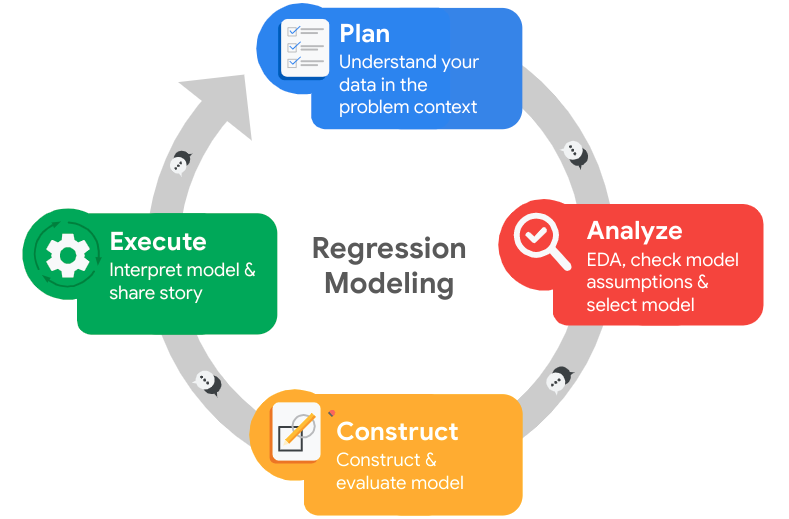

## **Pace: Plan**

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

|Variable  |Description |
|-----|-----|
|satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
|last_evaluation|Score of employee's last performance review [0&ndash;1]|
|number_project|Number of projects employee contributes to|
|average_monthly_hours|Average number of hours employee worked per month|
|time_spend_company|How long the employee has been with the company (years)
|Work_accident|Whether or not the employee experienced an accident while at work
|left|Whether or not the employee left the company
|promotion_last_5years|Whether or not the employee was promoted in the last 5 years
|Department|The employee's department
|salary|The employee's salary (U.S. dollars)

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [193]:
# Import packages for data manipulation
import pandas as pd
import numpy as np

### Load dataset

In [194]:
# Load dataset into a dataframe
df0 = pd.read_csv("HR_capstone_dataset.csv")

# Display first few rows of the dataframe
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [195]:
# Gather basic information about the data
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [196]:
# Gather descriptive statistics about the data
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

In [197]:
# Display all column names
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [198]:
# Rename columns as needed
df0 = df0.rename(columns={'average_montly_hours': 'average_monthly_hours',
                          'time_spend_company': 'tenure',
                          'Work_accident': 'work_accident', 
                          'Department': 'department'
                         })

# Display all column names after the update
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [199]:
# Check for missing values
df0.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

There are no missing values in the data.

### Check duplicates

Check for any duplicate entries in the data.

In [200]:
# Check for duplicates
df0.duplicated().sum()

3008

3008 rows are duplicated. This is about 20% of the data.

In [201]:
# Inspect some rows containing duplicates as needed
df0[df0.duplicated()]

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [202]:
# Inspect some last duplicated rows
df0[df0.duplicated()].tail(10)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
14989,0.43,0.57,2,159,3,1,1,0,technical,low
14990,0.89,0.88,5,228,5,1,1,0,support,low
14991,0.09,0.81,6,257,4,0,1,0,support,low
14992,0.40,0.48,2,155,3,0,1,0,support,low
14993,0.76,0.83,6,293,6,0,1,0,support,low
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low
14998,0.37,0.52,2,158,3,0,1,0,support,low


Almost last rows in the data are duplicated. It seems that there is a mistake when importing data and it is very unlikely that these observations are legitimate, so we can drop them.

In [203]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df1 = df0.drop_duplicates()

# Check for duplicates again
df1.duplicated().sum()

0

### Check outliers

Check for outliers in the data.

In [204]:
# Import packages for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

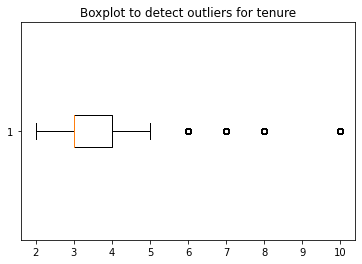

In [205]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
plt.boxplot(df1['tenure'], vert=False)
plt.title('Boxplot to detect outliers for tenure')
plt.show()

In [206]:
# Determine the number of rows containing outliers
(df1['tenure'] >= 6).sum()

824

In [207]:
q1 = df1['tenure'].quantile(0.25)
q3 = df1['tenure'].quantile(0.75)
iqr = q3 - q1
upper_limit = q3 + 1.5*iqr
lower_limit = q1 - 1.5*iqr
outlier = df1[(df1['tenure'] > upper_limit) | (df1['tenure'] < lower_limit)]
print(f'Lower limit: {lower_limit}')
print(f'Upper limit: {upper_limit}')
print(f'Number of outliers in `tenure`: {outlier.shape[0]}')

Lower limit: 1.5
Upper limit: 5.5
Number of outliers in `tenure`: 824


# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [208]:
# Get numbers of people who left vs. stayed
print(df1['left'].value_counts())
print()

# Get percentages of people who left vs. stayed
print(df1['left'].value_counts(normalize=True))

0    10000
1     1991
Name: left, dtype: int64

0    0.833959
1    0.166041
Name: left, dtype: float64


### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

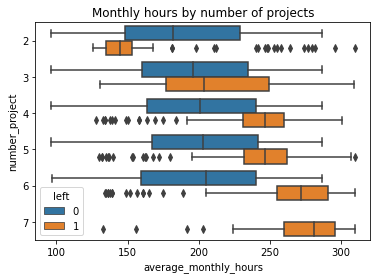

In [209]:
# Create a boxplot showing distribution of 'average_monthly_hours' for 'number_project', comparing stayed vs. left employees
sns.boxplot(data=df1, x= 'average_monthly_hours', y='number_project', hue='left', orient='h')
plt.title('Monthly hours by number of projects')
plt.show()

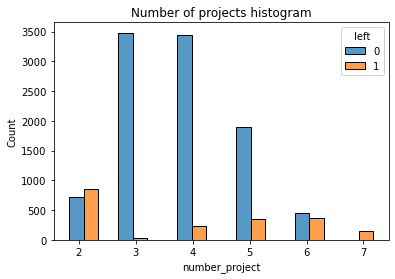

In [210]:
# Create a histogram showing distributions for 'number_project', comparing stayed vs. left group
sns.histplot(data=df1, x='number_project', hue='left', multiple='dodge', shrink=3)
plt.title('Number of projects histogram')
plt.show()

In [211]:
# Get value counts of stayed/left for employees with 7 projects
df1[df1['number_project']==7]['left'].value_counts()

1    145
Name: left, dtype: int64

From 2 plots above, we can see that:  
1. Employees who join more projects also have longer work hours. It happens in both stayed and left group. However, with the same number of projects, there are 2 groups of employess who left the company:   
    (A) those who worked considerably less than their peers (eg: when number_project = 2): it's possible  that they were fired.  
    (B) those who worked much more than their peers (eg: when number_project = 6): it's reasonable to infer that they probably quit. Employees in this group likely contributed a lots to the projects they joined and they might have been the largest contributors to their projects.    

2. The ideal number of projects for employees to work on seems to be 3-4. The ratio for left vs. stayed is very small for these cohorts.  

3. If we assume a work week 40 hours and 2 weeks of vacation per year, then `average working hours per month = 50 weeks * 40 hours per week / 12 months = 166.67 hours`. This means that, aside from employees who joined 2 projects and left the company, other groups - even those who stayed in the company - worked considerably more hours than this. It seems that employees here are overworked.  

4. All workers with 7 projects left the company. They spent about 260-296 hours per month on working, at least 100 hours more than standard time calculated above. It is also equivalent to the range of monthly working hours for employees who left the company after finishing 6 projects. This range is much more than any other groups.  

Next, examine the average monthly hours versus the satisfaction levels.

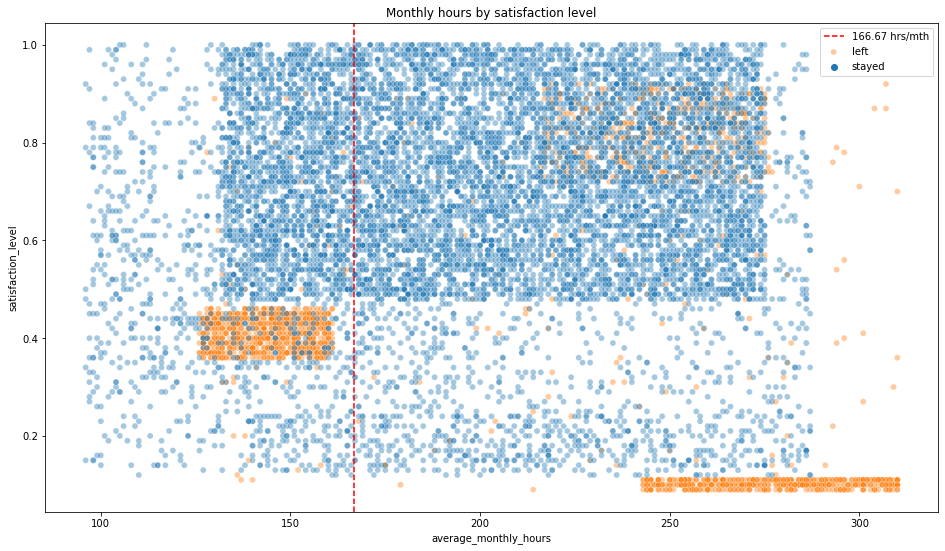

In [212]:
# Create a scatterplot of 'average_monthly_hours' vs. 'satisfaction_level', comparing stayed vs. left group
plt.figure(figsize=(16, 9))
sns.scatterplot(data=df1, x='average_monthly_hours', y='satisfaction_level', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='r', label='166.67 hrs/mth', ls='--')
plt.legend(labels=['166.67 hrs/mth', 'left', 'stayed'])
plt.title('Monthly hours by satisfaction level')
plt.show()

The scatterplot above shows that there are 3 groups of employees who left the company:  
    (A) Employees worked 130-160 hours per month, less than normal working hours. However, their satisfaction level was only around 0.4. It's possible that they were not interested in their work.  
    (B) Employees worked 240-315 hours per month, much more than normal working hours. Their satisfaction was close to 0. It is very likely that those left because they are too stressed out at work.  
    (C) Employees worked 210-280 hours per month with their satisfaction level ranging 0.7-0.9. It could be that those are satisfied with their salaries and bonuses they deserved to receive after spending much time on work.

For the next visualization, it might be interesting to visualize satisfaction levels by tenure.

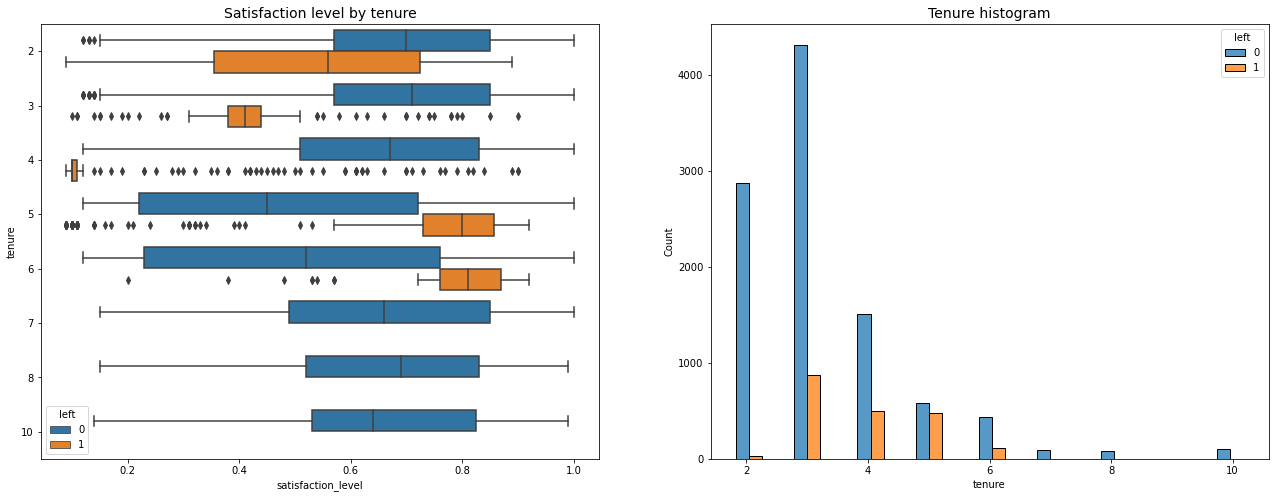

In [213]:
# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize=(22,8))

# Create a boxplot showing distribution of 'satisfaction_level' by tenure, comparing stayed vs. left groups
sns.boxplot(data=df1, x='satisfaction_level', y='tenure', hue='left', orient='h', ax=ax[0])
ax[0].set_title('Satisfaction level by tenure', fontsize=14)

# Create a histogram of tenure, comparing stayed vs. left groups
sns.histplot(data=df1, x='tenure', hue='left', multiple='dodge', shrink=5, ax=ax[1])
ax[1].set_title('Tenure histogram', fontsize=14)

plt.show()

There are some observations we could make from the plots above:
1. Employees who left fall into 3 groups: moderatedly satisfied employees with short tenures (2-3 years), very satisfied employees with medium-length tenures (5-6 years), and four-year employees with an unusually low satisfaction level. It's worth investigating changes to company policy that might have affected people specifically at the four-year mark.
2. Employees with longest tenures (7-10 years) didn't leave. Their satisfaction level is in range of 0.5-0.8 and it is equivalent to that of newer employees who stayeds. 
3. The histogram shows that there are relatively few long-tenured employees. It's likely that they are highly paid or they are high-ranking officers. 

As the next step in analyzing the data, you could calculate the mean and median satisfaction scores of employees who left and those who didn't.

In [214]:
# Calculate the mean and median satisfaction scores of employees who left and those who stayed
df1.groupby(['left'])['satisfaction_level'].agg(['mean', 'median'])

,mean,median
left,,
0,0.667365,0.69
1,0.440271,0.41


As expected, the mean and median satisfaction scores of employees who stayed are higher than those of employees who left. Besides, that mean lower than median for employees who stayed indicates their satisfaction levels might be left-skewed. In contrast, that mean higher than median for employees who left indicates their satisfaction levels might be right-skewed.

Next, examine salary levels for different tenures.

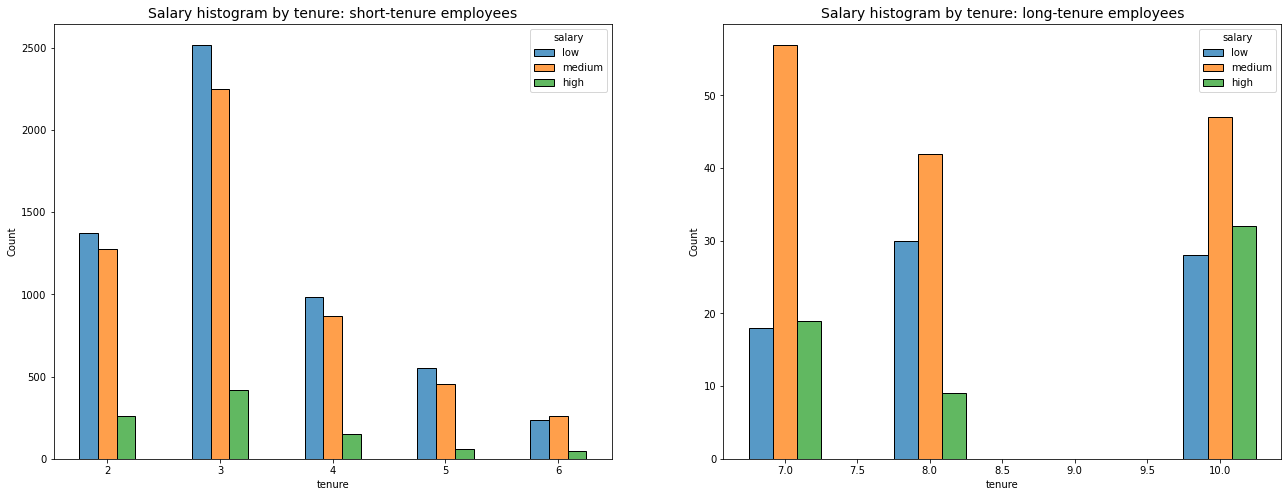

In [215]:
# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize=(22,8))

# Categorize employees with tenure
tenure_short = df1[df1['tenure'] <= 6]
tenure_long = df1[df1['tenure'] >= 7]

# Plot short-tenure
sns.histplot(data=tenure_short, x='tenure', hue='salary', hue_order=['low', 'medium', 'high'], 
             discrete=1, multiple='dodge', shrink=0.5, ax=ax[0])
ax[0].set_title('Salary histogram by tenure: short-tenure employees', fontsize=14)

# Plot long-tenure
sns.histplot(data=tenure_long, x='tenure', hue='salary', hue_order=['low', 'medium', 'high'], 
             discrete=1, multiple='dodge', shrink=0.5, ax=ax[1])
ax[1].set_title('Salary histogram by tenure: long-tenure employees', fontsize=14)

plt.show()

The plots above show that long-tenured employees were not disproportionately comprised of higher-paid employees.

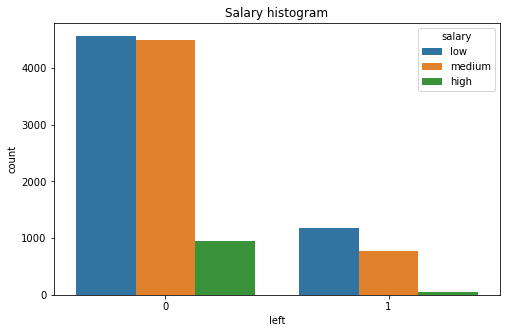

In [216]:
# Create a histogram of salary, comparing stayed vs. left groups
plt.figure(figsize=(8, 5))
sns.countplot(data=df1, x='left', hue='salary')
plt.title('Salary histogram')
plt.show()

In [217]:
# Calculate the proportion of employees by salary, comparing stayed vs. left groups
percent_employee = (pd.crosstab(df1['left'], df1['salary'], normalize='index') * 100).round(2)
salary_order = ['low', 'medium', 'high']
percent_employee = percent_employee.reindex(columns=salary_order)
print(percent_employee)

salary    low  medium  high
left                       
0       45.66   44.92  9.42
1       58.97   38.62  2.41


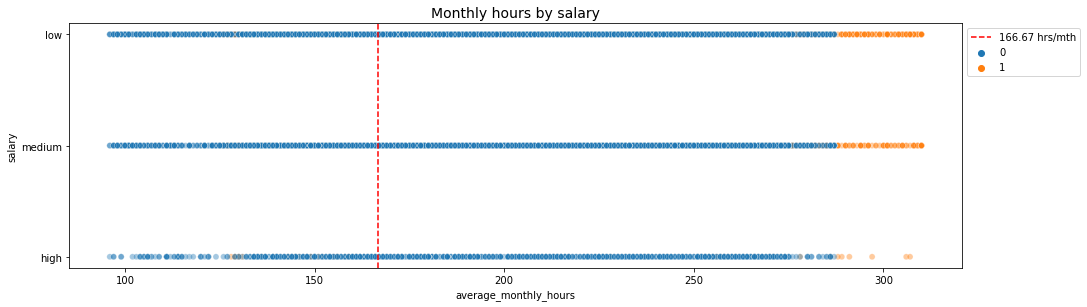

In [218]:
# Create a plot to examine relationship between 'average_monthly_hours' and 'salary'
plt.figure(figsize=(16, 4.5))
sns.scatterplot(data=df1, x='average_monthly_hours', y='salary', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='r', label='166.67 hrs/mth', ls='--')
plt.legend(labels=['166.67 hrs/mth', 'left', 'stayed'])
plt.title('Monthly hours by salary', fontsize=14)
plt.legend(loc='upper left',bbox_to_anchor=(1, 1))
plt.show()

It could be seen that: 
1. Many employees worked longer hours than the standard hours with low and medium salary.
2. The proportion of high-paid employees is very low. This is even more evident in the group of employees who left (2.41%).

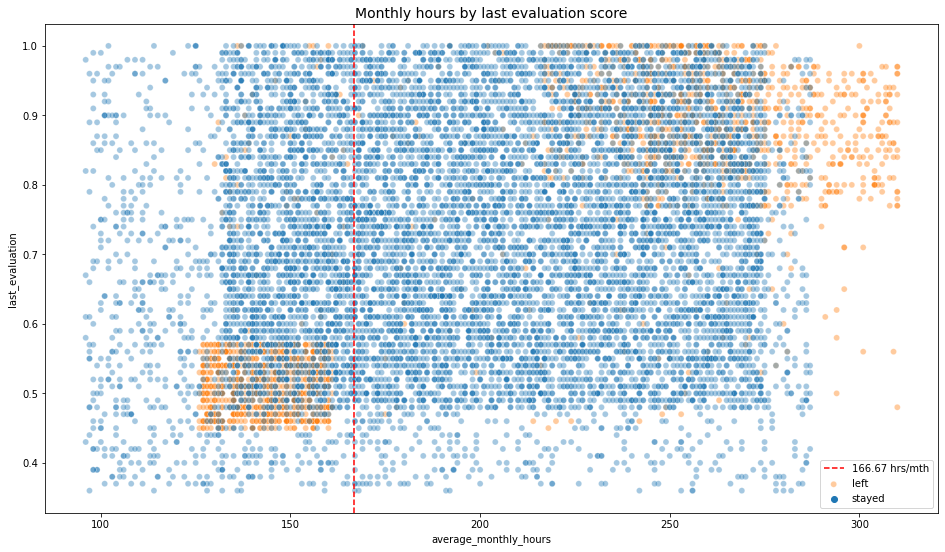

In [219]:
# Create a scatterplot of 'average_monthly_hours' vs. 'last_evaluation'
plt.figure(figsize=(16, 9))
sns.scatterplot(data=df1, x='average_monthly_hours', y='last_evaluation', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='r', label='166.67 hrs/mth', ls='--')
plt.legend(labels=['166.67 hrs/mth', 'left', 'stayed'])
plt.title('Monthly hours by last evaluation score', fontsize=14)
plt.show()

Some observations can be made from the scatterplot above:
1. Employees who left are in 2 groups:  
    (A) Overword employees had good performance at 0.8-1.  
    (B) Employees who worked less than the nominal monthly average of 166.67 hours had lower evaluation scores around 0.45-0.55.  
2. The correlation between work hours and evaluation score is not clear. Working long hours doesn't guarantee a good evaluation score.

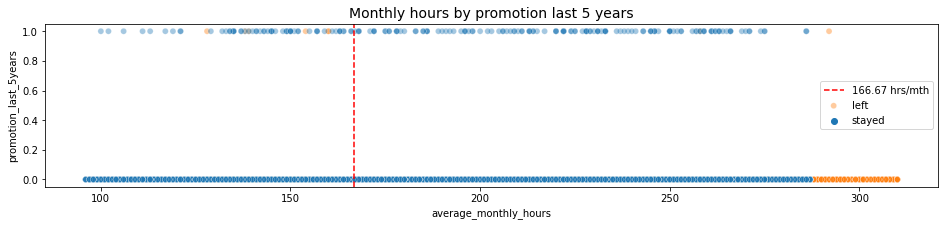

In [220]:
# Create a plot to examine relationship between 'average_monthly_hours' and 'promotion_last_5years	'
plt.figure(figsize=(16, 3))
sns.scatterplot(data=df1, x='average_monthly_hours', y='promotion_last_5years', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='r', label='166.67 hrs/mth', ls='--')
plt.legend(labels=['166.67 hrs/mth', 'left', 'stayed'])
plt.title('Monthly hours by promotion last 5 years', fontsize=14)
plt.show()

In [221]:
print(df1['promotion_last_5years'].value_counts())
print()
print(df1['promotion_last_5years'].value_counts(normalize=True))

0    11788
1      203
Name: promotion_last_5years, dtype: int64

0    0.983071
1    0.016929
Name: promotion_last_5years, dtype: float64


The plot and statistic above show the following:
1. There are very few employees promoted last 5 years. They make up only 1.7% of the total workforce. 
2. Most employees who left are those who work the longest hours but didn't get promoted.

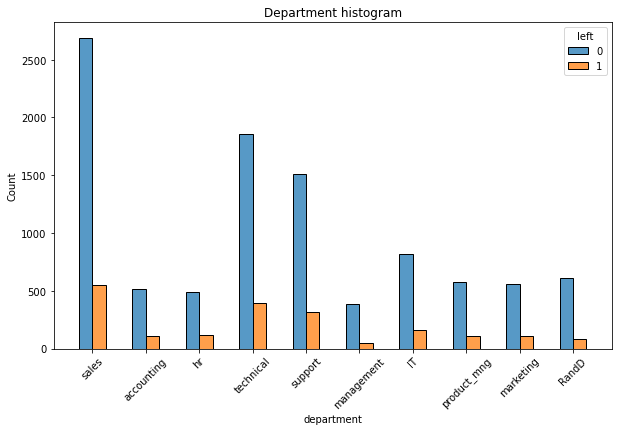

In [222]:
# Create a histogram of department
plt.figure(figsize=(10,6))
sns.histplot(data=df1, x='department', hue='left', discrete=1, multiple='dodge', shrink=0.5)
plt.xticks(rotation=45)
plt.title('Department histogram')
plt.show()

It seems that there is no significant difference among departments in the proportion of employees who stayed to those who left.

In [223]:
# Calculate the proportion of employees who experienced an accident while working
(pd.crosstab(df1['left'], df1['work_accident'], normalize='index') * 100).round(2)

work_accident,0,1
left,,
0,82.55,17.45
1,94.73,5.27


Just 5.27% employees who left experienced an accident while at work, so injury might not be a main reason for employees to quit.  

Lastly, check for strong correlations between variables in the data. 

In [224]:
df0.corr()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_monthly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
tenure,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


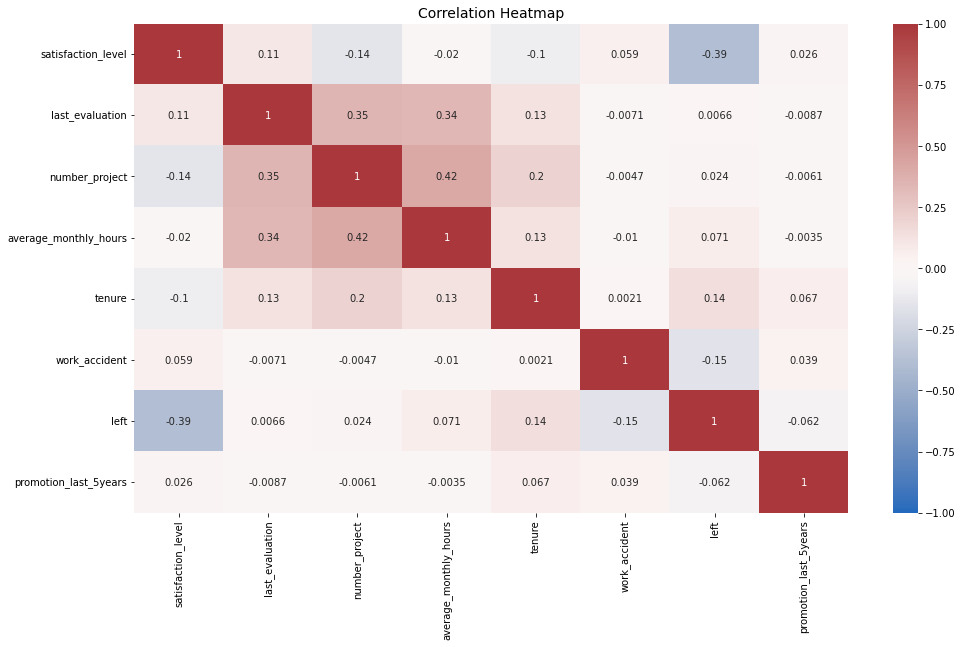

In [225]:
# Plot a correlation heatmap
plt.figure(figsize=(16, 9))
sns.heatmap(df0.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette('vlag', as_cmap=True))
plt.title('Correlation Heatmap', fontsize=14)
plt.show()

The heatmap above confirms that the number of project, monthly hours, and evaluation scores all have some positive correlation with each other, and whether an employee leaves is negatively correlated with their satisfaction level.

### Insights

In general, there are some problems that make employees leave this company:
1. A large number of employees at this company are being overworked.
2. Employees who left are those who worked longer hours, joined many projects, and had lower satisfaction levels.
3. It can be ungratifying to work long hours and not receive promotions or good evaluation scores or high salary.
4. If an employee has spent 7 years or more at the company, they tend not to leave.

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


## Step 3. Model Building
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

Your goal is to predict whether an employee leaves the company, which is a categorical outcome variable. So this task involves classification. More specifically, this involves binary classification, since the outcome variable `left` can be either 1 (indicating employee left) or 0 (indicating employee didn't leave).

### Identify the types of models most appropriate for this task.

Since the variable you want to predict (whether an employee leaves the company) is categorical, you could either build a Logistic Regression model, or a Tree-based Machine Learning model.

### Modeling: Logistic Regression Model

Note that binomial logistic regression suits the task because it involves binary classification.

Before splitting the data, encode the non-numeric variables. There are two: `department` and `salary`.

`department` is a categorical variable, which means you can dummy it for modeling.

`salary` is categorical too, but it's ordinal. There's a hierarchy to the categories, so it's better not to dummy this column, but rather to convert the levels to numbers, 0–2.

In [226]:
# Import packages for data modeling
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split
import sklearn.metrics as metrics

In [227]:
# Copy the dataset
df_enc = df1.copy()

# Encode 'salary' column as an ordinal numberic category
df_enc['salary'] = df_enc['salary'].astype('category').cat.set_categories(['low', 'medium', 'high']).cat.codes

# Dummy encode for 'department' column
df_enc = pd.get_dummies(df_enc)

df_enc.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


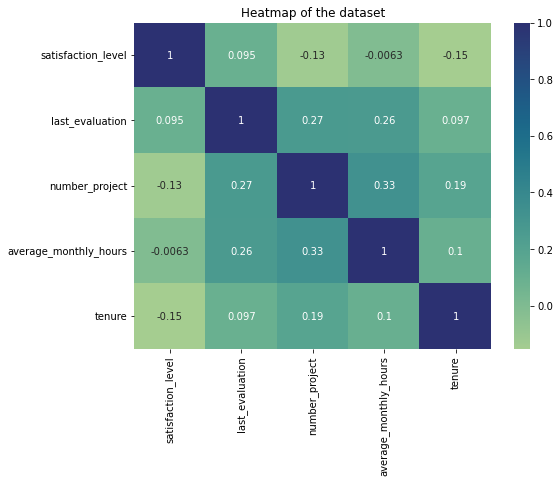

In [228]:
# Creat a heatmap to visualize how correlated variables are
plt.figure(figsize=(8,6))
sns.heatmap(df_enc[['satisfaction_level', 'last_evaluation', 'number_project', 'average_monthly_hours', 'tenure']].corr(), 
            annot=True, cmap='crest')
plt.title('Heatmap of the dataset')
plt.show()

Since logistic regression is quite sensitive to outliers, it would be a good idea at this stage to remove the outliers in the `tenure` column that were identified earlier. 

In [229]:
# Remove outliers in 'tenure' column
df_logreg = df_enc[(df_enc['tenure'] >= lower_limit) & (df_enc['tenure'] <= upper_limit)]
df_logreg.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [230]:
# Classify outcome and predictor variables (y - outcome var, X - predictor vars)
y = df_logreg['left']
X = df_logreg.drop('left', axis=1)

In [231]:
# Split the data into training data and testing data, stratify based on the values in 'y', since the data is unbalanced
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25, random_state=42)

In [232]:
# Construct a logistic regression model and fit it to the training dataset
model = LogisticRegression(max_iter=500)
log_clf = model.fit(X_train, y_train)

In [233]:
# Create a series whose index is the column names and whose values are the coefficients
pd.Series(model.coef_[0], index=X.columns)

satisfaction_level       -4.342216
last_evaluation          -0.011544
number_project           -0.486120
average_monthly_hours     0.003572
tenure                    1.104225
work_accident            -1.500826
promotion_last_5years    -1.162908
salary                   -0.521515
department_IT            -0.080436
department_RandD         -0.322737
department_accounting    -0.286185
department_hr            -0.002660
department_management    -0.196840
department_marketing     -0.113399
department_product_mng   -0.099855
department_sales          0.033214
department_support        0.021761
department_technical      0.028319
dtype: float64

In [234]:
# Get the intercept of the model
model.intercept_

array([-1.31819065])

**Evaluate a model**: use the model to make predictions on the testing data

In [235]:
# Save predictions
y_pred = log_clf.predict(X_test)

Create a confusion matrix to visualize the results of the logistic regression model.

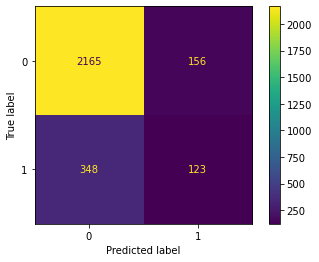

In [236]:
# Create values for confusion matrix
log_cm = metrics.confusion_matrix(y_test, y_pred, labels=log_clf.classes_)

# Create the confusion matrix
log_disp = metrics.ConfusionMatrixDisplay(confusion_matrix=log_cm, display_labels=log_clf.classes_)

# Display the confusion matrix
log_disp.plot(values_format='')

plt.show()

True negatives (upper-left): The number of people who did not leave that the model accurately predicted did not leave.

False positives (upper-right): The number of people who did not leave the model inaccurately predicted as leaving.

False negatives (bottom-left): The number of people who left that the model inaccurately predicted did not leave

True positives (bottom-right): The number of people who left the model accurately predicted as leaving

In [237]:
# Check the class balance in the data
df_logreg['left'].value_counts(normalize=True) * 100

0    83.146772
1    16.853228
Name: left, dtype: float64

There is an approximately 83%-17% split. So the data is not perfectly balanced, but it is not too imbalanced. Therefore, we can use this data without modifying the class balance and continue evaluating the model.

In [238]:
# Create classification report for logistic regression model
target_names = ['Predicted would not leave', 'Predicted would leave']
print(metrics.classification_report(y_test, y_pred, target_names=target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.86      0.93      0.90      2321
    Predicted would leave       0.44      0.26      0.33       471

                 accuracy                           0.82      2792
                macro avg       0.65      0.60      0.61      2792
             weighted avg       0.79      0.82      0.80      2792



In [239]:
# Create a list of (column_name, coefficient) tuples
feature_importance = list(zip(X_train.columns, model.coef_[0]))

# Sort the list by coefficient value
feature_importance = sorted(feature_importance, key=lambda x: x[1], reverse=True)
feature_importance

[('tenure', 1.104224978513383),
 ('department_sales', 0.03321412660123512),
 ('department_technical', 0.028318980270409314),
 ('department_support', 0.02176141363245784),
 ('average_monthly_hours', 0.003572149589120449),
 ('department_hr', -0.0026595830743663305),
 ('last_evaluation', -0.011544469744931833),
 ('department_IT', -0.08043647571221),
 ('department_product_mng', -0.09985453092830286),
 ('department_marketing', -0.11339855207750765),
 ('department_management', -0.1968403833470192),
 ('department_accounting', -0.2861852824056907),
 ('department_RandD', -0.322737317551961),
 ('number_project', -0.48612049529172574),
 ('salary', -0.5215149627013298),
 ('promotion_last_5years', -1.1629082927158163),
 ('work_accident', -1.5008261623149792),
 ('satisfaction_level', -4.342215952078815)]

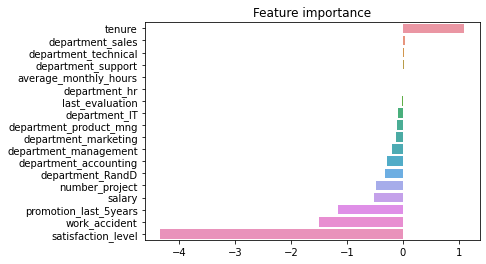

In [240]:
# Plot the feature importances
sns.barplot(x=[x[1] for x in feature_importance],
            y=[x[0] for x in feature_importance],
            orient='h')
plt.title('Feature importance');

The plot above shows that in this logistic regression model, `tenure` have positive effect and `satisfaction_level`, `work_accident`, `promotion_last_5years` have negative effect on the rate of employees who left.

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




Detailed Results for Each Class:  
1. Predicted would not leave:
    - Precision = 0.86: Out of all the instances predicted as "would not leave," 86% were correct.
    - Recall = 0.93: Out of all the actual instances where the label was "would not leave," the model correctly identified 93% of them.
    - F1-score = 0.90: The F1-score, which is the harmonic mean of Precision and Recall, indicates good performance for this class.
    - Support = 2321: This is the number of actual instances belonging to the "would not leave" class.  


2. Predicted would leave:
    - Precision = 0.44: Out of all the instances predicted as "would leave," only 44% were correct.
    - Recall = 0.26: Out of all the actual instances where the label was "would leave," the model correctly identified only 26% of them.
    - F1-score = 0.33: The low F1-score shows the model struggles to balance Precision and Recall for this class.
    - Support = 471: This is the number of actual instances belonging to the "would leave" class.  


3. Aggregated Metrics:
    - Accuracy = 0.82: The overall accuracy of the model, considering all instances, is 82%.
    - Macro avg (Macro Average): This is the unweighted average of Precision, Recall, and F1-score across all classes. It treats each class equally, regardless of the number of instances:
        + Precision = 0.65
        + Recall = 0.60
        + F1-score = 0.61
    - Weighted avg (Weighted Average): This is the average of Precision, Recall, and F1-score across all classes, weighted by the number of instances in each class. It better reflects the model’s performance considering the class imbalance:
        + Precision = 0.79
        + Recall = 0.82
        + F1-score = 0.80  


4. Conclusion:
    - The model performs well on the "would not leave" class, which is the majority class in the data.
    - For the minority class, "would leave", the model’s performance is much weaker, as reflected in the lower Precision, Recall, and F1-score.
    - This likely results from class imbalance, as there are far fewer "would leave" instances (471) compared to "would not leave" instances (2321).

### Conclusion & Recommendations 

The following conclusions can be drawn from the above analysis:
- Employees at the company are overworked.
- The longer employees stay at a company, the less likely they are to leave.
- The low level of satisfaction and no chance of promotion are the main reasons why employees left.

To retain employees, the following recommendations could be presented to the stakeholders:
- Consider promoting employees who have been with the company for at least four years, or conduct further investigation about why four-year tenured employees are so dissatisfied.
- Either reward employees for working longer hours, or don't require them to do so.
- Consider a proportionate scale for rewarding employees who contribute more/put in more effort.